In [1]:
import os

# Move working directory to project root if launched from /notebooks
if os.getcwd().endswith("notebooks"):
    os.chdir("..")

print("Working directory:", os.getcwd())

Working directory: /Users/brandonaw/Documents/GitHub/BT4012_Project/Project - Github


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import matplotlib

# Change path accordingly
df = pd.read_csv('./data/dataset_B_05_2020.csv')

# EDA

**Checking for general abnormalities of data table first**

In [3]:
df_copy = df.copy()

# Drop content features since they require webscraping
content_features_to_drop = ['nb_hyperlinks', 'ratio_intHyperlinks',
       'ratio_extHyperlinks', 'ratio_nullHyperlinks', 'nb_extCSS',
       'ratio_intRedirection', 'ratio_extRedirection', 'ratio_intErrors',
       'ratio_extErrors', 'login_form', 'external_favicon', 'links_in_tags',
       'submit_email', 'ratio_intMedia', 'ratio_extMedia', 'sfh', 'iframe',
       'popup_window', 'safe_anchor', 'onmouseover', 'right_clic',
       'empty_title', 'domain_in_title', 'domain_with_copyright']

# Drop external features that are not helpful due to limitations in data collection
external_features_to_drop = ['domain_registration_length', 'domain_age', 'google_index', 'web_traffic', 'whois_registered_domain']

df_copy = df_copy.drop(columns=content_features_to_drop + external_features_to_drop)

# Convert phishing to be '1' and legitmate to be '0'
df_copy['status'] = df_copy['status'].map({'phishing': 1, 'legitimate': 0})

# List of all features
print(df_copy.columns)
print(f"Feature count: {len(df_copy.columns)-2}")

print("preview a sample:")
display(df_copy.head())
print("\n")

is_phishing = df_copy[df_copy['status'] == 1]
is_legitmate = df_copy[df_copy['status'] == 0]

print("preview phishing texts:")
display(is_phishing.head())
display(is_phishing.shape)
print("\n")

print("preview legitimate texts:")
display(is_legitmate.head())
display(is_legitmate.shape)
print("\n")

print("number of observations and features:")
display(df_copy.shape)
print("\n")

print("data types:")
display(df_copy.dtypes)
print("\n")

print("check for duplicated rows:")
display(df_copy[df_copy.duplicated()])
print("\n")

print("missing values per feature:")
display(df_copy.isna().sum())
print("\n")

print("number of missing cells:")
print(df_copy.isna().sum().sum())
print("\n")

print("percentage of missing cells:")
print(round(df_copy.isna().sum().sum() / df_copy.size * 100, 1))

Index(['url', 'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens',
       'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore',
       'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,dns_record,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,4.500000,0,0,0,0,0,0,1,4,0
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,14.666667,0,0,0,0,0,0,0,2,1
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,8.142857,0,0,0,0,0,0,0,0,1
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,0.000000,0,0,0,0,0,0,0,3,0
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,7.000000,0,0,0,0,0,0,0,6,0




preview phishing texts:


,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,dns_record,page_rank,status
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,14.666667,0,0,0,0,0,0,0,2,1
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,8.142857,0,0,0,0,0,0,0,0,1
5,http://appleid.apple.com-app.es/,32,24,0,3,1,0,0,0,0,...,0.000000,0,0,0,0,0,0,0,0,1
7,http://www.shadetreetechnology.com/V4/validati...,81,27,1,2,0,0,0,0,0,...,14.666667,0,0,0,0,0,0,0,2,1
13,http://html.house/l7ceeid6.html,31,10,0,2,0,0,0,0,0,...,6.000000,0,0,0,0,0,0,0,4,1


(5715, 60)



preview legitimate texts:


,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,dns_record,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,4.5,0,0,0,0,0,0,1,4,0
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0,3,0
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,7.0,0,0,0,0,0,0,0,6,0
6,http://www.mutuo.it,19,12,0,2,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0,1,0
8,http://vamoaestudiarmedicina.blogspot.com/,42,34,0,2,0,0,0,0,0,...,0.0,0,1,0,0,0,0,0,5,0


(5715, 60)



number of observations and features:


(11430, 60)



data types:


url                         object
length_url                   int64
length_hostname              int64
ip                           int64
nb_dots                      int64
nb_hyphens                   int64
nb_at                        int64
nb_qm                        int64
nb_and                       int64
nb_or                        int64
nb_eq                        int64
nb_underscore                int64
nb_tilde                     int64
nb_percent                   int64
nb_slash                     int64
nb_star                      int64
nb_colon                     int64
nb_comma                     int64
nb_semicolumn                int64
nb_dollar                    int64
nb_space                     int64
nb_www                       int64
nb_com                       int64
nb_dslash                    int64
http_in_path                 int64
https_token                  int64
ratio_digits_url           float64
ratio_digits_host          float64
punycode            



check for duplicated rows:


,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,dns_record,page_rank,status




missing values per feature:


url                        0
length_url                 0
length_hostname            0
ip                         0
nb_dots                    0
nb_hyphens                 0
nb_at                      0
nb_qm                      0
nb_and                     0
nb_or                      0
nb_eq                      0
nb_underscore              0
nb_tilde                   0
nb_percent                 0
nb_slash                   0
nb_star                    0
nb_colon                   0
nb_comma                   0
nb_semicolumn              0
nb_dollar                  0
nb_space                   0
nb_www                     0
nb_com                     0
nb_dslash                  0
http_in_path               0
https_token                0
ratio_digits_url           0
ratio_digits_host          0
punycode                   0
port                       0
tld_in_path                0
tld_in_subdomain           0
abnormal_subdomain         0
nb_subdomains              0
prefix_suffix 



number of missing cells:
0


percentage of missing cells:
0.0


The dataset reflects a perfectly balanced class distribution, with phishing and legitimate URLs each representing 50% of the observations. In addition, **no missing values or duplicate rows were detected**, suggesting that the dataset requires minimal preprocessing at this stage.

**Checking Distribution of Each Feature**

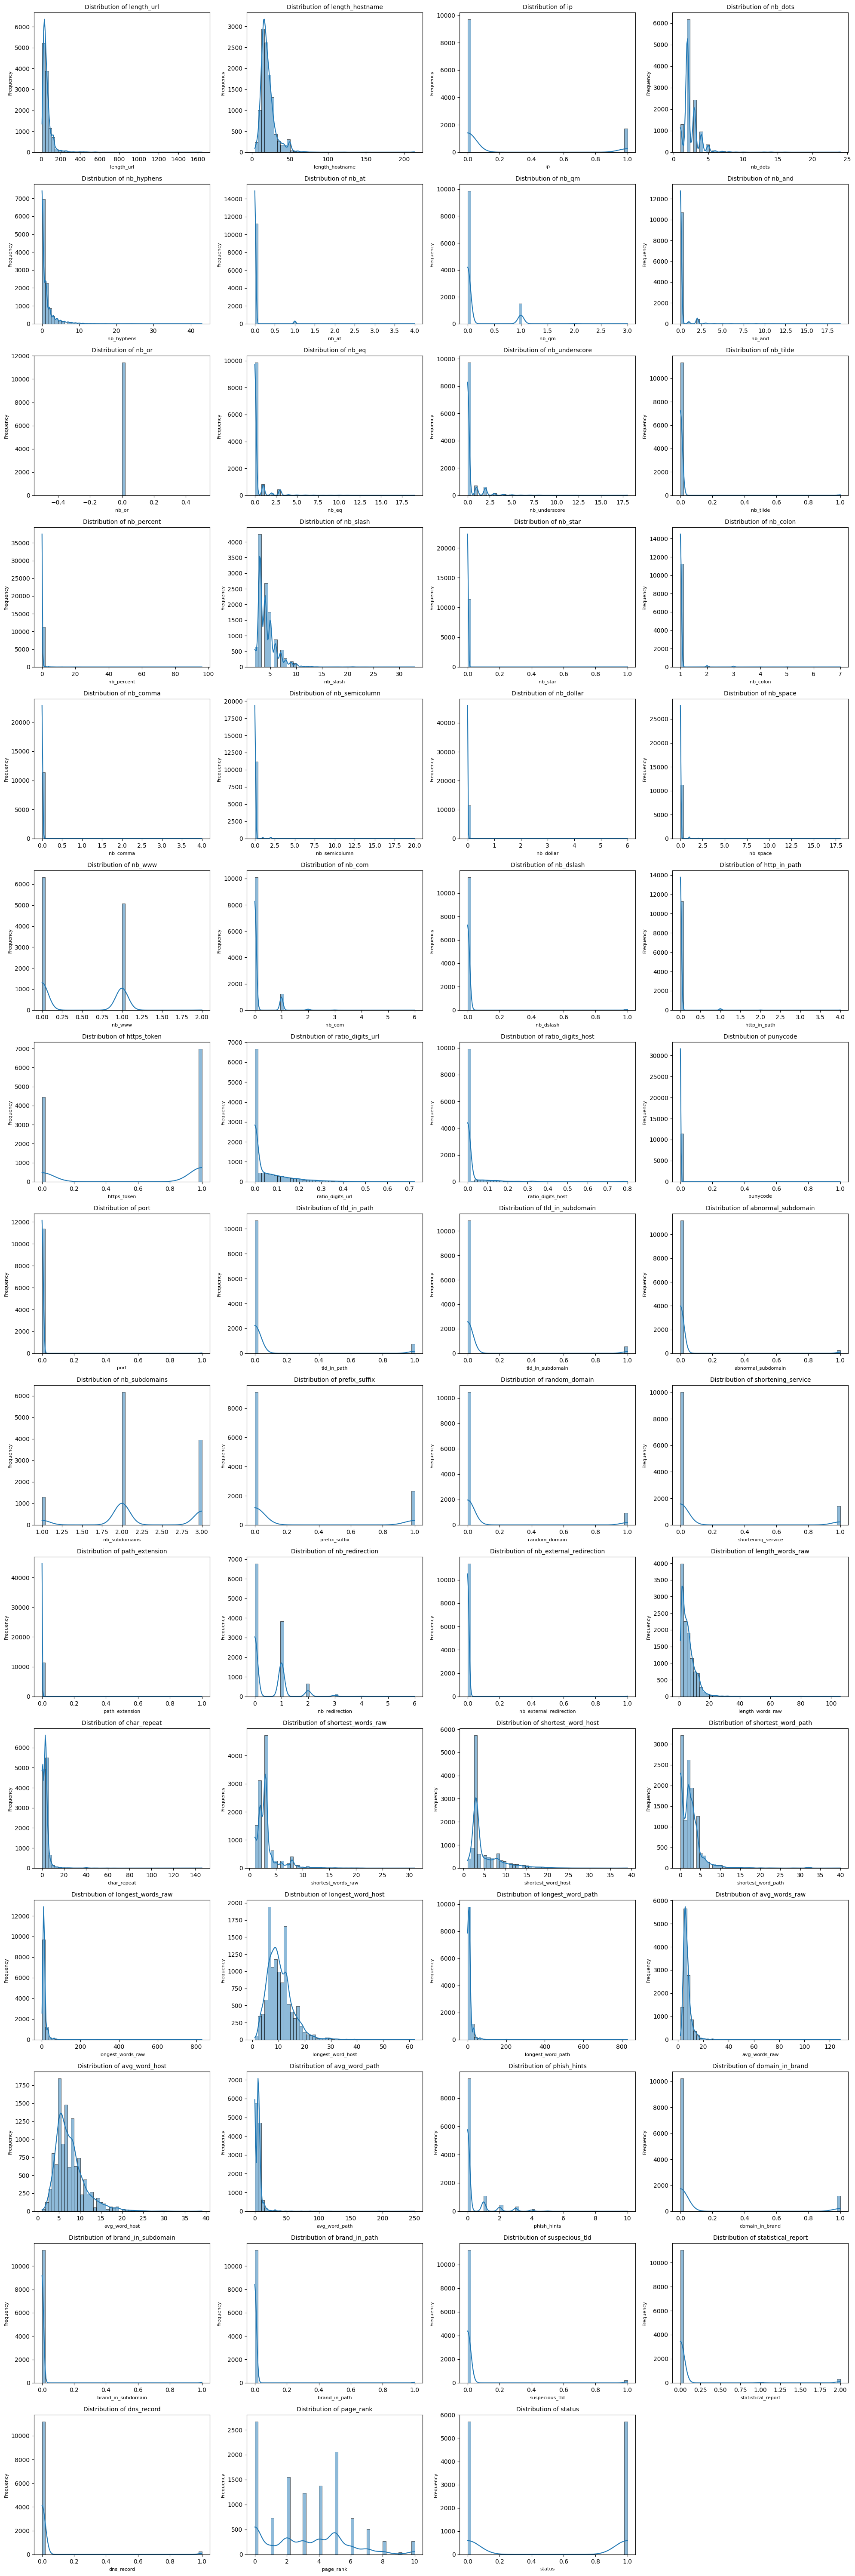

In [4]:
# Select only numerical columns for histograms
numerical_features = df_copy.select_dtypes(include=np.number).columns

# Calculate number of rows and columns for subplots
num_features = len(numerical_features)
num_cols = 4
num_rows = (num_features + num_cols - 1) // num_cols

plt.figure(figsize=(num_cols * 5, num_rows * 4))

# Go through each of the numerical features and check distribution using histogram
for i, feature in enumerate(numerical_features):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(df_copy[feature], bins=50, kde=True)
    plt.title(f'Distribution of {feature}', fontsize=10)
    plt.xlabel(feature, fontsize=8)
    plt.ylabel('Frequency', fontsize=8)

plt.tight_layout()
plt.show()

For the remaining non-binary features that exhibit strong skewness, applying a logarithmic transformation may help stabilize variance and improve distributional symmetry. (TBC)

In [5]:
# Obtain numerical features ONLY
df_numeric = df_copy.select_dtypes(include=np.number)

# Obtain variance of each numerical feature
variance = df_numeric.var()

# Sort features by variance in descending order
sorted_variance = variance.sort_values(ascending=False)

print("Variance of each feature:")
display(sorted_variance)

zero_variance = sorted_variance[sorted_variance <= 0.001]
print("\nFeatures with very low/zero variance:")
display(zero_variance)

Variance of each feature:


length_url                 3057.793382
longest_word_path           532.588701
longest_words_raw           487.687354
length_hostname             116.147416
avg_word_path                51.080320
length_words_raw             31.051142
longest_word_host            24.324769
char_repeat                  22.742749
avg_words_raw                17.187877
shortest_word_host           15.536051
avg_word_host                12.805195
shortest_word_path            8.986857
page_rank                     6.436143
shortest_words_raw            4.891048
nb_hyphens                    4.355931
nb_slash                      3.542870
nb_percent                    2.150477
nb_dots                       1.876040
nb_underscore                 1.195383
nb_eq                         0.996637
phish_hints                   0.709975
nb_and                        0.674595
nb_redirection                0.478735
nb_subdomains                 0.405857
nb_semicolumn                 0.357831
nb_www                   


Features with very low/zero variance:


nb_star           0.000699
punycode          0.000350
path_extension    0.000175
nb_or             0.000000
dtype: float64

Since features with **extremely low or zero variance** do not help differentiate between classes, they can be **excluded** from the dataset to reduce noise and improve model efficiency.

**Features to drop:** nb_star, punycode, path_extension, nb_or

**Correlation Matrix of All Features**

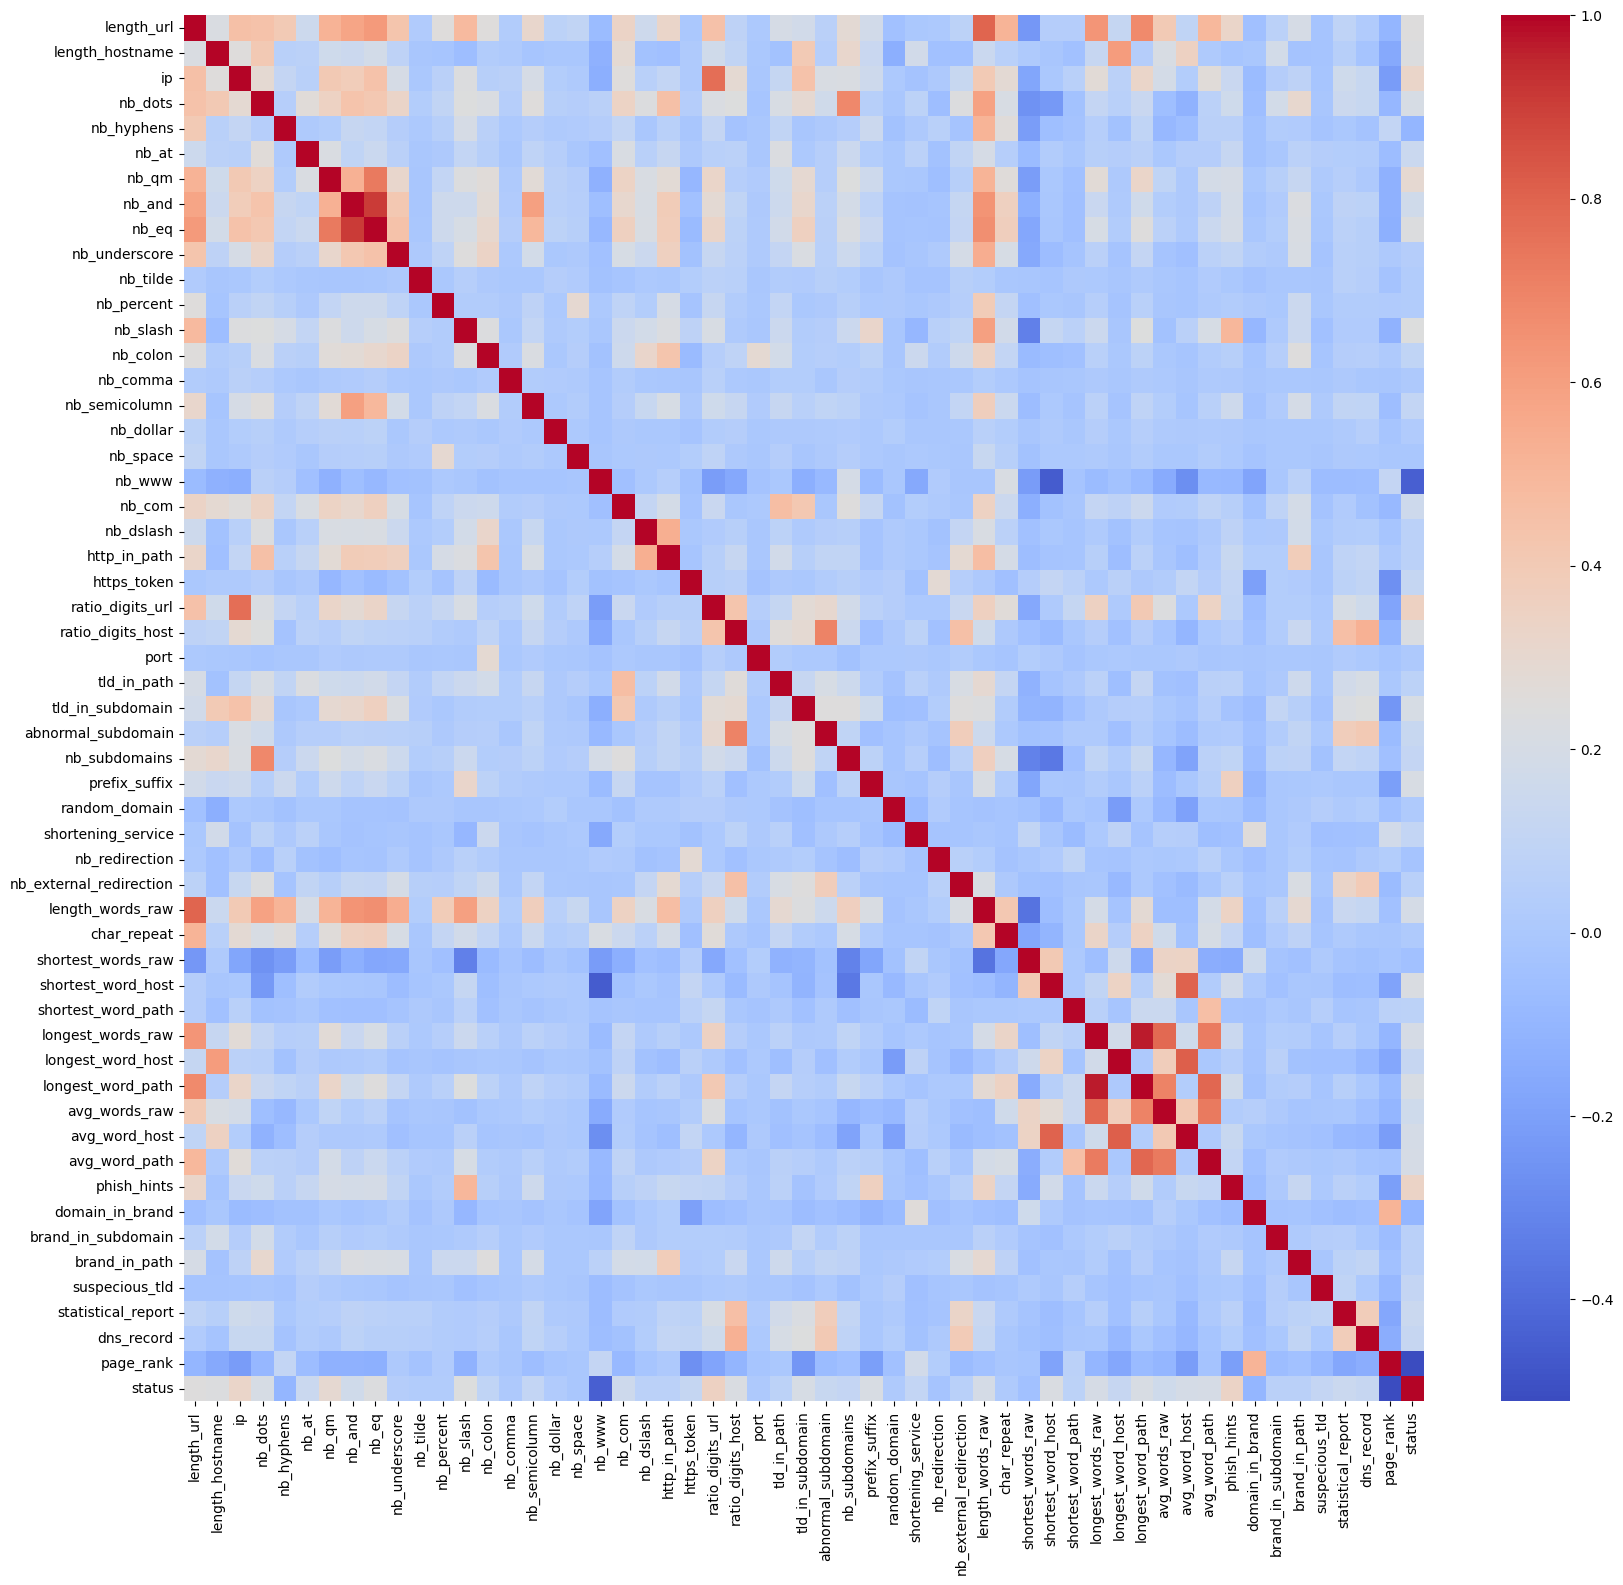

In [6]:
# Obtain columns to drop (including 'url' and those with very low variance)
columns_to_drop = ['url'] + list(zero_variance.index)

# Drop features with very low/zero variance + URL feature
df_numeric_updated = df_copy.drop(columns=columns_to_drop)

# Calculate correlation after dropping specified columns
corr = df_numeric_updated.corr()

plt.figure(figsize=(20, 18))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.show()

In [7]:
# Find correlation of each feature to status
# Used absolute since just need the absolute values to determine correlation
correlation_with_status = abs(df_numeric_updated.corr()['status']).sort_values(ascending=False)

print("Correlation of features with 'status' (descending order):")
display(correlation_with_status)

# Find features that only correlate a maximum of 0.1 to the 'status' feature, we will drop these ones
correlation_with_status_10 = correlation_with_status[correlation_with_status <= 0.1]

print("\nFeatures that only correlate a maximum of 0.1 to the 'status' feature:")
display(correlation_with_status_10)

Correlation of features with 'status' (descending order):


status                     1.000000
page_rank                  0.511137
nb_www                     0.443468
ratio_digits_url           0.356395
phish_hints                0.335393
ip                         0.321698
nb_qm                      0.294319
length_url                 0.248580
nb_slash                   0.242270
length_hostname            0.238322
nb_eq                      0.233386
ratio_digits_host          0.224335
shortest_word_host         0.223084
prefix_suffix              0.214681
longest_word_path          0.212709
tld_in_subdomain           0.208884
nb_dots                    0.207029
longest_words_raw          0.200147
avg_word_path              0.197256
avg_word_host              0.193502
length_words_raw           0.192010
nb_and                     0.170546
avg_words_raw              0.167564
nb_com                     0.156284
statistical_report         0.143944
nb_at                      0.142915
abnormal_subdomain         0.128160
longest_word_host          0


Features that only correlate a maximum of 0.1 to the 'status' feature:


domain_in_brand            0.098222
nb_colon                   0.092835
tld_in_path                0.079147
shortest_word_path         0.074365
nb_dslash                  0.072602
http_in_path               0.070776
brand_in_path              0.065156
brand_in_subdomain         0.064257
nb_external_redirection    0.056210
shortest_words_raw         0.039364
nb_underscore              0.038091
nb_tilde                   0.030142
nb_percent                 0.028101
nb_dollar                  0.024962
nb_redirection             0.024405
random_domain              0.019631
char_repeat                0.014732
nb_comma                   0.011865
port                       0.009011
nb_space                   0.004193
Name: status, dtype: float64

Since these features **exhibit minimal correlation** with the status label, their **impact** on model performance is **likely negligible**. Removing them helps reduce noise and improve model efficiency.

**Features to drop:** domain_in_brand, nb_colon, tld_in_path, shortest_word_path, nb_dslash, http_in_path, brand_in_path, brand_in_subdomain, nb_external_redirection, shortest_words_raw, nb_underscore, nb_tilde, nb_percent, nb_dollar, nb_redirection, random_domain, char_repeat, nb_comma, port, nb_space

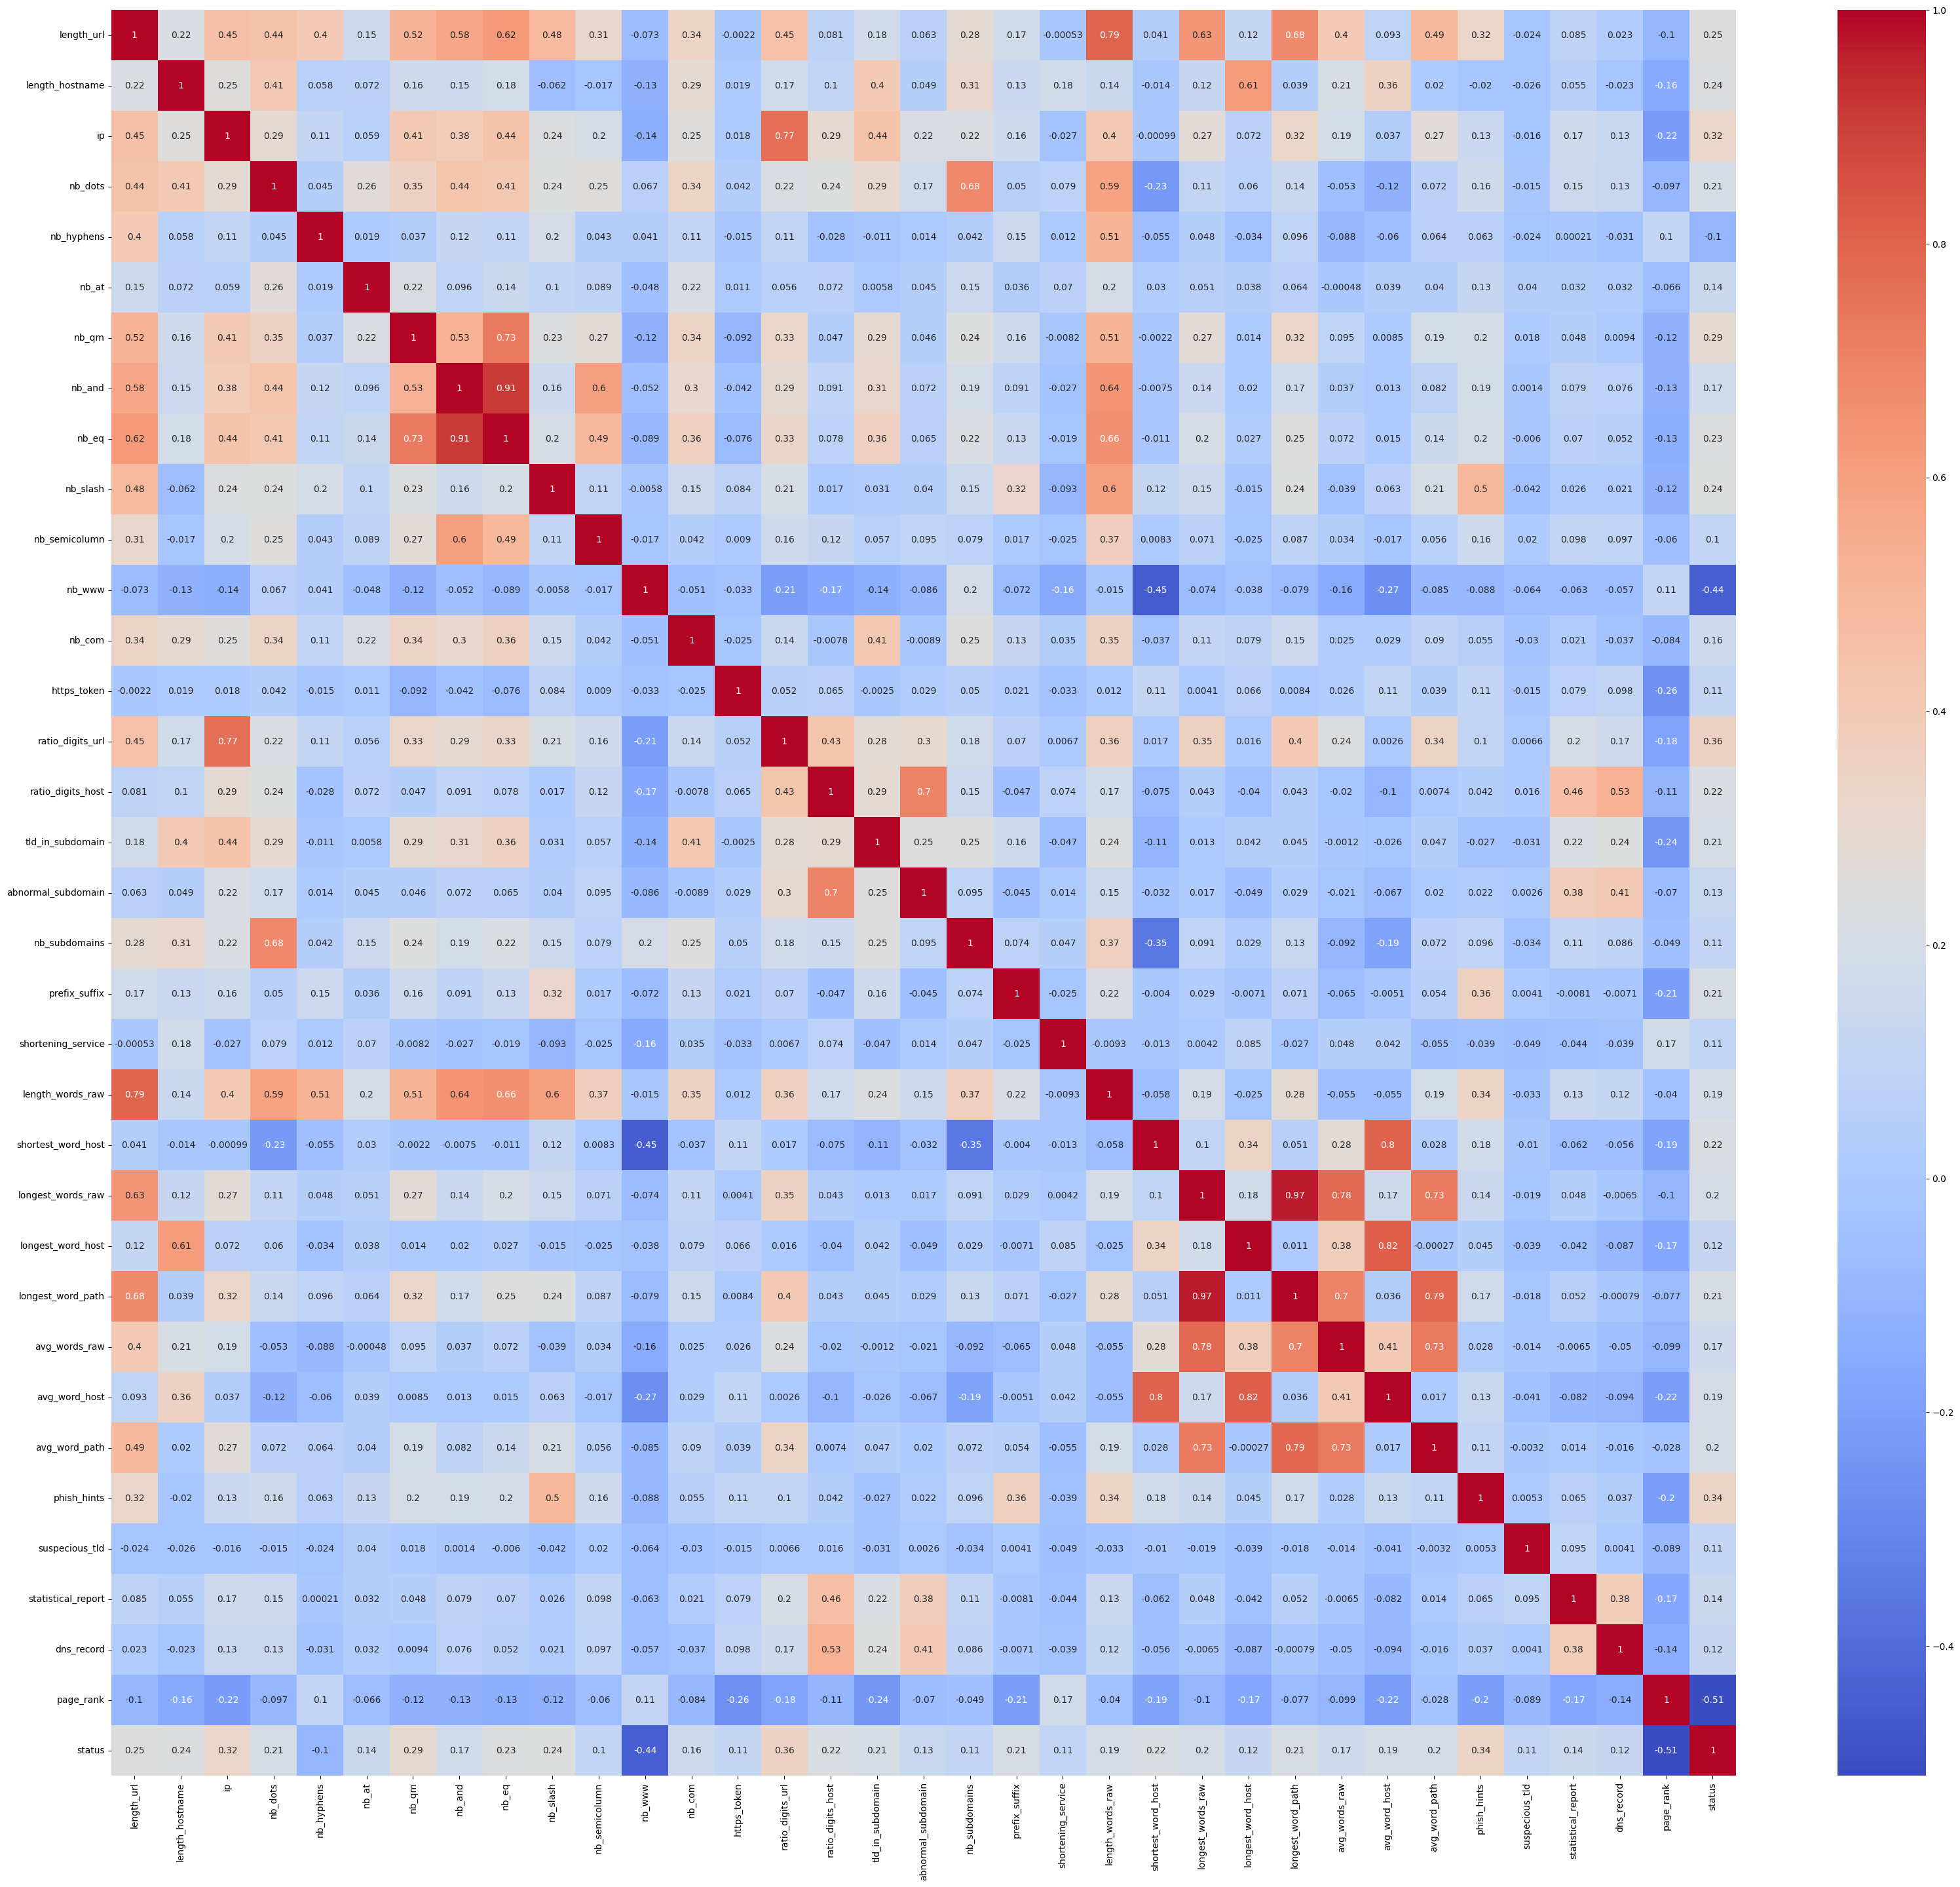

In [8]:
# Find correlation of each feature to each other
# Drop features with low correlation to 'status' feature
df_numeric_updated = df_numeric_updated.drop(columns=list(correlation_with_status_10.index))

corr = df_numeric_updated.corr(numeric_only=True)

# Plotting out the correlation matrix
plt.figure(figsize=(40, 35))

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [9]:
# Obtain the correlation of the remaining features in descending order
correlation_with_status = abs(df_numeric_updated.corr()['status']).sort_values(ascending=False)

# Check correlation of these features amongst each other
for feature in list(correlation_with_status.index):
  if feature == 'status':
    continue
  feature_correlation = abs(df_numeric_updated.corr()[feature]).sort_values(ascending=False)
  feature_correlation_70 = feature_correlation[feature_correlation > 0.7]
  print(f"Correlation of {feature} with other features that are > 0.7:")
  display(feature_correlation_70)

Correlation of page_rank with other features that are > 0.7:


page_rank    1.0
Name: page_rank, dtype: float64

Correlation of nb_www with other features that are > 0.7:


nb_www    1.0
Name: nb_www, dtype: float64

Correlation of ratio_digits_url with other features that are > 0.7:


ratio_digits_url    1.000000
ip                  0.768906
Name: ratio_digits_url, dtype: float64

Correlation of phish_hints with other features that are > 0.7:


phish_hints    1.0
Name: phish_hints, dtype: float64

Correlation of ip with other features that are > 0.7:


ip                  1.000000
ratio_digits_url    0.768906
Name: ip, dtype: float64

Correlation of nb_qm with other features that are > 0.7:


nb_qm    1.000000
nb_eq    0.731735
Name: nb_qm, dtype: float64

Correlation of length_url with other features that are > 0.7:


length_url          1.00000
length_words_raw    0.79471
Name: length_url, dtype: float64

Correlation of nb_slash with other features that are > 0.7:


nb_slash    1.0
Name: nb_slash, dtype: float64

Correlation of length_hostname with other features that are > 0.7:


length_hostname    1.0
Name: length_hostname, dtype: float64

Correlation of nb_eq with other features that are > 0.7:


nb_eq     1.000000
nb_and    0.906404
nb_qm     0.731735
Name: nb_eq, dtype: float64

Correlation of ratio_digits_host with other features that are > 0.7:


ratio_digits_host     1.000000
abnormal_subdomain    0.702772
Name: ratio_digits_host, dtype: float64

Correlation of shortest_word_host with other features that are > 0.7:


shortest_word_host    1.000000
avg_word_host         0.800014
Name: shortest_word_host, dtype: float64

Correlation of prefix_suffix with other features that are > 0.7:


prefix_suffix    1.0
Name: prefix_suffix, dtype: float64

Correlation of longest_word_path with other features that are > 0.7:


longest_word_path    1.000000
longest_words_raw    0.968503
avg_word_path        0.791198
avg_words_raw        0.701914
Name: longest_word_path, dtype: float64

Correlation of tld_in_subdomain with other features that are > 0.7:


tld_in_subdomain    1.0
Name: tld_in_subdomain, dtype: float64

Correlation of nb_dots with other features that are > 0.7:


nb_dots    1.0
Name: nb_dots, dtype: float64

Correlation of longest_words_raw with other features that are > 0.7:


longest_words_raw    1.000000
longest_word_path    0.968503
avg_words_raw        0.784753
avg_word_path        0.725344
Name: longest_words_raw, dtype: float64

Correlation of avg_word_path with other features that are > 0.7:


avg_word_path        1.000000
longest_word_path    0.791198
avg_words_raw        0.729817
longest_words_raw    0.725344
Name: avg_word_path, dtype: float64

Correlation of avg_word_host with other features that are > 0.7:


avg_word_host         1.000000
longest_word_host     0.816313
shortest_word_host    0.800014
Name: avg_word_host, dtype: float64

Correlation of length_words_raw with other features that are > 0.7:


length_words_raw    1.00000
length_url          0.79471
Name: length_words_raw, dtype: float64

Correlation of nb_and with other features that are > 0.7:


nb_and    1.000000
nb_eq     0.906404
Name: nb_and, dtype: float64

Correlation of avg_words_raw with other features that are > 0.7:


avg_words_raw        1.000000
longest_words_raw    0.784753
avg_word_path        0.729817
longest_word_path    0.701914
Name: avg_words_raw, dtype: float64

Correlation of nb_com with other features that are > 0.7:


nb_com    1.0
Name: nb_com, dtype: float64

Correlation of statistical_report with other features that are > 0.7:


statistical_report    1.0
Name: statistical_report, dtype: float64

Correlation of nb_at with other features that are > 0.7:


nb_at    1.0
Name: nb_at, dtype: float64

Correlation of abnormal_subdomain with other features that are > 0.7:


abnormal_subdomain    1.000000
ratio_digits_host     0.702772
Name: abnormal_subdomain, dtype: float64

Correlation of longest_word_host with other features that are > 0.7:


longest_word_host    1.000000
avg_word_host        0.816313
Name: longest_word_host, dtype: float64

Correlation of dns_record with other features that are > 0.7:


dns_record    1.0
Name: dns_record, dtype: float64

Correlation of https_token with other features that are > 0.7:


https_token    1.0
Name: https_token, dtype: float64

Correlation of nb_subdomains with other features that are > 0.7:


nb_subdomains    1.0
Name: nb_subdomains, dtype: float64

Correlation of suspecious_tld with other features that are > 0.7:


suspecious_tld    1.0
Name: suspecious_tld, dtype: float64

Correlation of shortening_service with other features that are > 0.7:


shortening_service    1.0
Name: shortening_service, dtype: float64

Correlation of nb_semicolumn with other features that are > 0.7:


nb_semicolumn    1.0
Name: nb_semicolumn, dtype: float64

Correlation of nb_hyphens with other features that are > 0.7:


nb_hyphens    1.0
Name: nb_hyphens, dtype: float64

For pairs of features with **high inter-correlation (>|0.7|)**, I drop features according to the ordering above. Since this order is determined by each feature’s correlation with the target (status), I **retain** the **more strongly correlated feature** and **remove** the **weaker** one. This helps mitigate multicollinearity while preserving features that are most predictive of the target.

**Features to drop:** ip, nb_eq, length_words_raw, abnormal_subdomain, avg_word_host, longest_words_raw, avg_word_path, avg_words_raw

Correlation of length_url with other features that are > 0.7:


length_url    1.0
Name: length_url, dtype: float64

Correlation of length_hostname with other features that are > 0.7:


length_hostname    1.0
Name: length_hostname, dtype: float64

Correlation of nb_dots with other features that are > 0.7:


nb_dots    1.0
Name: nb_dots, dtype: float64

Correlation of nb_hyphens with other features that are > 0.7:


nb_hyphens    1.0
Name: nb_hyphens, dtype: float64

Correlation of nb_at with other features that are > 0.7:


nb_at    1.0
Name: nb_at, dtype: float64

Correlation of nb_qm with other features that are > 0.7:


nb_qm    1.0
Name: nb_qm, dtype: float64

Correlation of nb_and with other features that are > 0.7:


nb_and    1.0
Name: nb_and, dtype: float64

Correlation of nb_slash with other features that are > 0.7:


nb_slash    1.0
Name: nb_slash, dtype: float64

Correlation of nb_semicolumn with other features that are > 0.7:


nb_semicolumn    1.0
Name: nb_semicolumn, dtype: float64

Correlation of nb_www with other features that are > 0.7:


nb_www    1.0
Name: nb_www, dtype: float64

Correlation of nb_com with other features that are > 0.7:


nb_com    1.0
Name: nb_com, dtype: float64

Correlation of https_token with other features that are > 0.7:


https_token    1.0
Name: https_token, dtype: float64

Correlation of ratio_digits_url with other features that are > 0.7:


ratio_digits_url    1.0
Name: ratio_digits_url, dtype: float64

Correlation of ratio_digits_host with other features that are > 0.7:


ratio_digits_host    1.0
Name: ratio_digits_host, dtype: float64

Correlation of tld_in_subdomain with other features that are > 0.7:


tld_in_subdomain    1.0
Name: tld_in_subdomain, dtype: float64

Correlation of nb_subdomains with other features that are > 0.7:


nb_subdomains    1.0
Name: nb_subdomains, dtype: float64

Correlation of prefix_suffix with other features that are > 0.7:


prefix_suffix    1.0
Name: prefix_suffix, dtype: float64

Correlation of shortening_service with other features that are > 0.7:


shortening_service    1.0
Name: shortening_service, dtype: float64

Correlation of shortest_word_host with other features that are > 0.7:


shortest_word_host    1.0
Name: shortest_word_host, dtype: float64

Correlation of longest_word_host with other features that are > 0.7:


longest_word_host    1.0
Name: longest_word_host, dtype: float64

Correlation of longest_word_path with other features that are > 0.7:


longest_word_path    1.0
Name: longest_word_path, dtype: float64

Correlation of phish_hints with other features that are > 0.7:


phish_hints    1.0
Name: phish_hints, dtype: float64

Correlation of suspecious_tld with other features that are > 0.7:


suspecious_tld    1.0
Name: suspecious_tld, dtype: float64

Correlation of statistical_report with other features that are > 0.7:


statistical_report    1.0
Name: statistical_report, dtype: float64

Correlation of dns_record with other features that are > 0.7:


dns_record    1.0
Name: dns_record, dtype: float64

Correlation of page_rank with other features that are > 0.7:


page_rank    1.0
Name: page_rank, dtype: float64

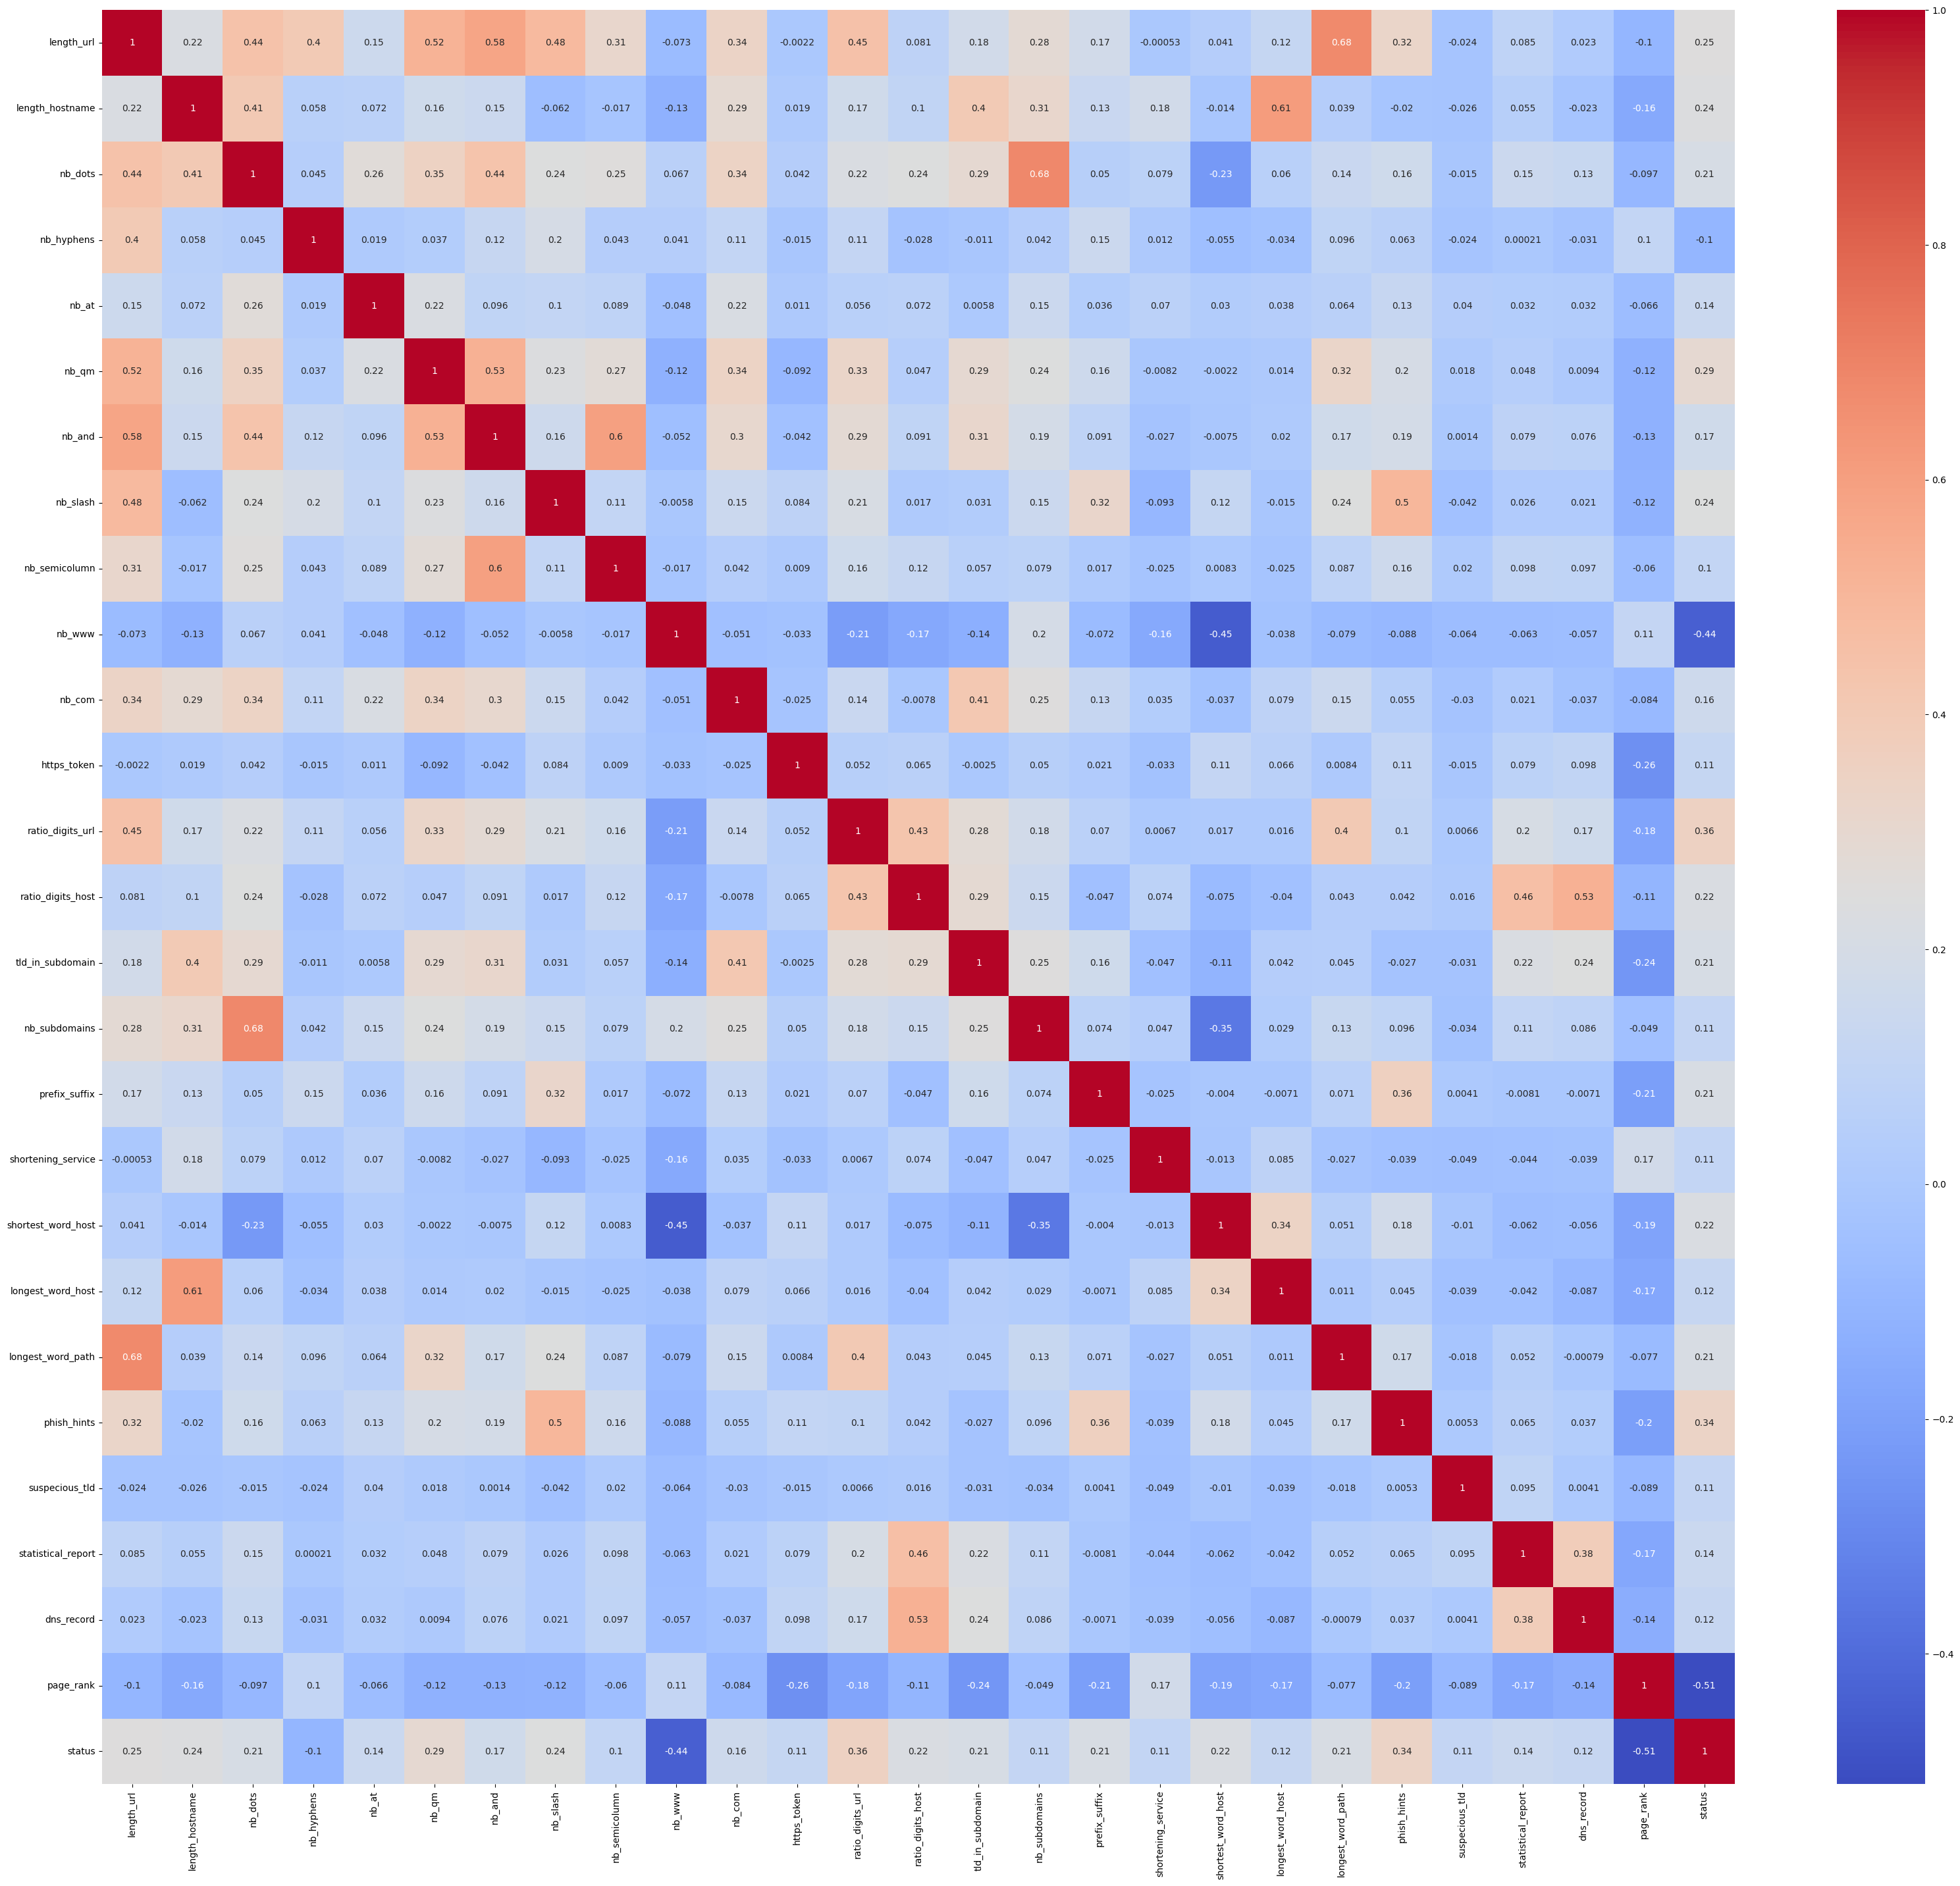

In [10]:
# Drop these columns as shown above
columns_to_drop = ['ip', 'nb_eq', 'length_words_raw', 'abnormal_subdomain', 'avg_word_host', 'longest_words_raw', 'avg_word_path', 'avg_words_raw']
df_numeric_updated = df_numeric_updated.drop(columns=columns_to_drop)

# Check for any missed out highly correlation amongst features again
for feature in list(df_numeric_updated.columns):
  if feature == 'status':
    continue
  feature_correlation = abs(df_numeric_updated.corr()[feature]).sort_values(ascending=False)
  feature_correlation_70 = feature_correlation[feature_correlation > 0.7]
  print(f"Correlation of {feature} with other features that are > 0.7:")
  display(feature_correlation_70)

# Plot correlation matrix
corr = df_numeric_updated.corr(numeric_only=True)
plt.figure(figsize=(40, 35))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

**Checking Distribution of Each Feature (After Cleaning)**

Index(['length_url', 'length_hostname', 'nb_dots', 'nb_hyphens', 'nb_at',
       'nb_qm', 'nb_and', 'nb_slash', 'nb_semicolumn', 'nb_www', 'nb_com',
       'https_token', 'ratio_digits_url', 'ratio_digits_host',
       'tld_in_subdomain', 'nb_subdomains', 'prefix_suffix',
       'shortening_service', 'shortest_word_host', 'longest_word_host',
       'longest_word_path', 'phish_hints', 'suspecious_tld',
       'statistical_report', 'dns_record', 'page_rank', 'status'],
      dtype='object')
Feature count: 26


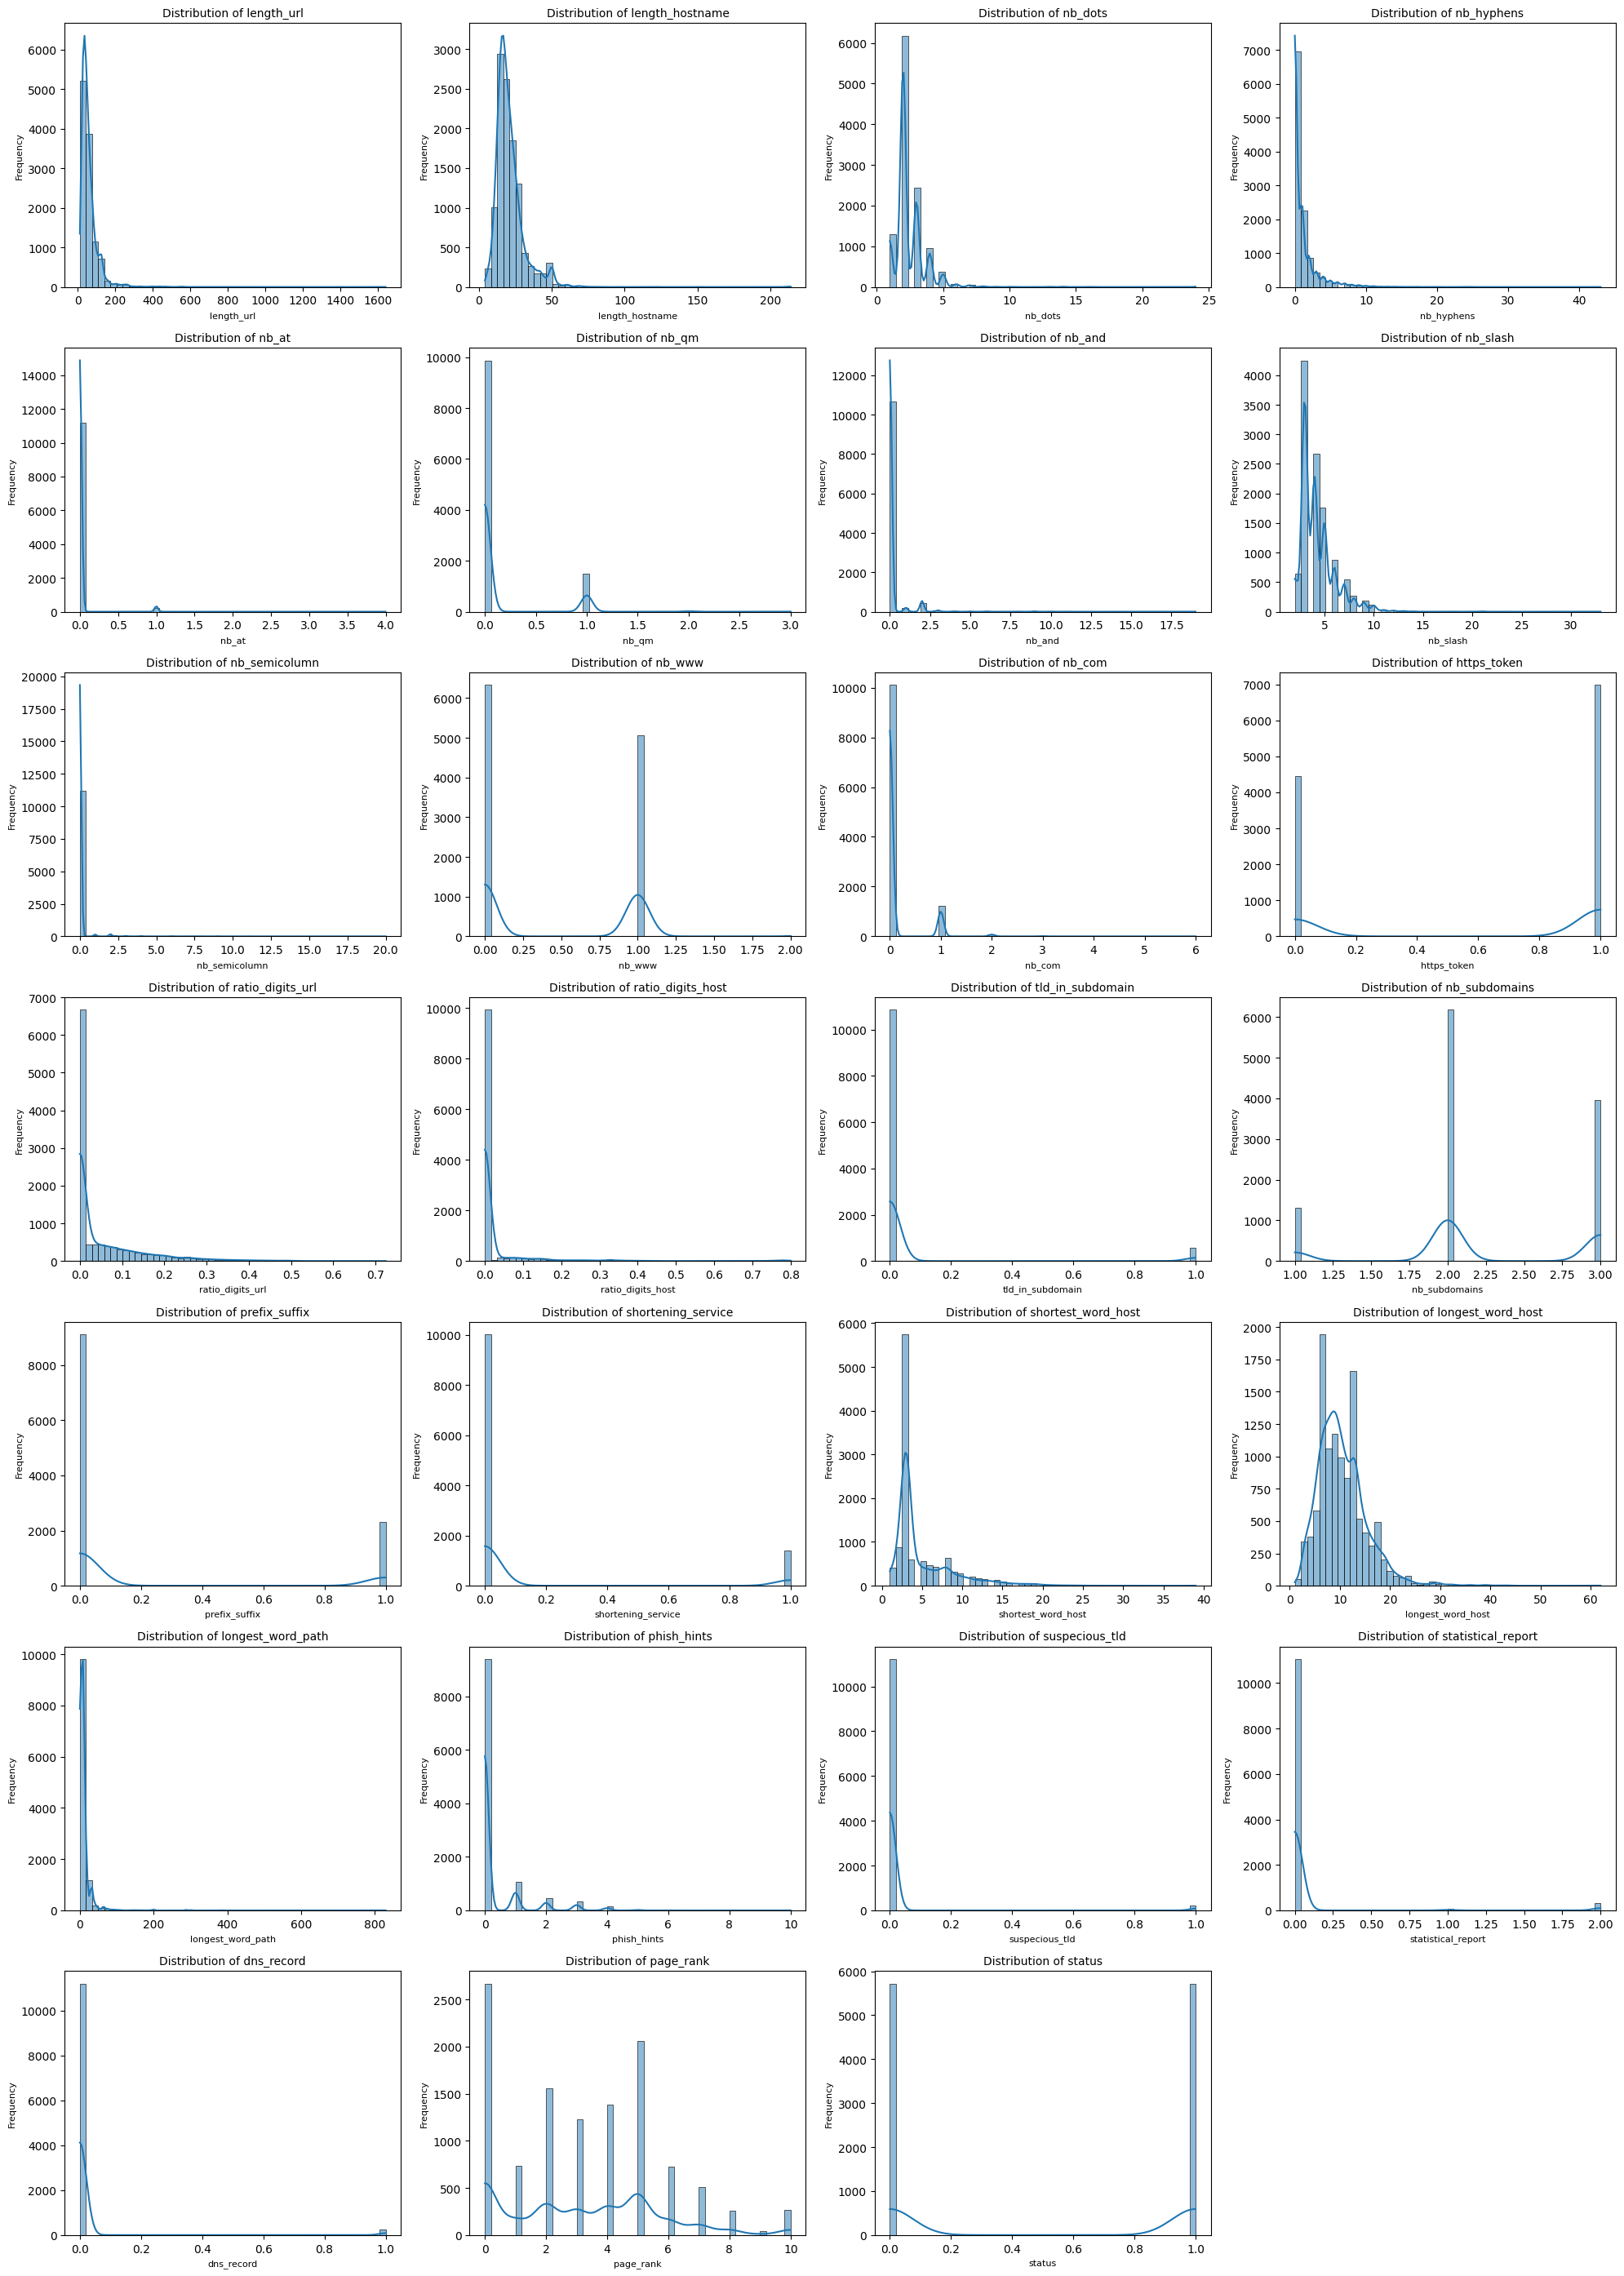

In [11]:
# Select only numerical columns for histograms
numerical_features = df_numeric_updated.select_dtypes(include=np.number).columns

# Show list of remaining features
print(numerical_features)
print(f"Feature count: {len(numerical_features)-1}")

# Calculate number of rows and columns for subplots
num_features = len(numerical_features)
num_cols = 4
num_rows = (num_features + num_cols - 1) // num_cols

plt.figure(figsize=(num_cols * 5, num_rows * 4))

# Go through each of the numerical features and check distribution using histogram
for i, feature in enumerate(numerical_features):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(df_copy[feature], bins=50, kde=True)
    plt.title(f'Distribution of {feature}', fontsize=10)
    plt.xlabel(feature, fontsize=8)
    plt.ylabel('Frequency', fontsize=8)

plt.tight_layout()
plt.show()

We also removed several features that were overly specific and led to misleading predictions in real-world scenarios.

**Features to drop**: nb_slash, https_token, nb_subdomains, nb_www, nb_com

# Validation (650k Dataset)

In [12]:
# Change path accordingly
df_650k = pd.read_csv('./data/phishing_binary_dataset.csv')

**Feature Engineering (NO content + external features)**

In [13]:
# @title
!pip install dnspython
!pip install python-whois
!pip install tldextract
!pip install imbalanced-learn
!pip install xgboost


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


External Features (2)

In [14]:
# @title
import requests
import dns.resolver
from functools import lru_cache

# Helps check if domain has DNS records with timeout
@lru_cache(maxsize=10000)
def dns_record(domain):
    try:
        # Set timeout for DNS query
        dns.resolver.timeout = 2.0
        dns.resolver.lifetime = 2.0

        nameservers = dns.resolver.resolve(domain, 'NS')
        if len(nameservers) > 0:
            return 0
        else:
            return 1
    except Exception:
        return 1

# Gets page rank with proper timeout, returns value of -1 if unavailable
def page_rank(key, domain):
    url = 'https://openpagerank.com/api/v1.0/getPageRank?domains%5B0%5D=' + domain
    try:
        request = requests.get(
            url,
            headers={'API-OPR': key},
            timeout=3
        )
        result = request.json()
        result = result['response'][0]['page_rank_integer']
        if result:
            return result
        else:
            return 0
    except Exception:
        return -1

URL Features (24)

In [15]:
# @title
import re
import socket

HINTS = ['wp', 'login', 'includes', 'admin', 'content', 'site', 'images',
         'js', 'alibaba', 'css', 'myaccount', 'dropbox', 'themes', 'plugins',
         'signin', 'view']

# Calculate ratio of digits in URL
def ratio_digits_url(url):
    if len(url) == 0:
        return 0
    return len(re.sub("[^0-9]", "", url)) / len(url)

# Calculate ratio of digits in hostname
def ratio_digits_host(hostname):
    if len(hostname) == 0:
        return 0
    return len(re.sub("[^0-9]", "", hostname)) / len(hostname)

# Obtain URL length
def length_url(url):
    return len(url)

# Obtain hostname length
def length_hostname(hostname):
    return len(hostname)

# Check if URL uses shortening services
def shortening_service(full_url):
    match = re.search(
        r'bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|'
        r'tr\.im|is\.gd|cli\.gs|yfrog\.com|migre\.me|ff\.im|tiny\.cc|'
        r'url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|short\.to|'
        r'BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|'
        r'fic\.kr|loopt\.us|doiop\.com|short\.ie|kl\.am|wp\.me|'
        r'rubyurl\.com|om\.ly|to\.ly|bit\.do|lnkd\.in|db\.tt|qr\.ae|'
        r'adf\.ly|bitly\.com|cur\.lv|tinyurl\.com|ity\.im|q\.gs|po\.st|'
        r'bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|'
        r'yourls\.org|prettylinkpro\.com|scrnch\.me|filoops\.info|'
        r'vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|link\.zip\.net',
        full_url
    )
    return 1 if match else 0

# Count the number of "@"
def count_at(base_url):
    return base_url.count('@')

# Count the number of ";"
def count_semicolumn(url):
    return url.count(';')

# Count the number of "&"
def count_and(base_url):
    return base_url.count('&')

# Count the number of "?"
def count_qm(base_url):
    return base_url.count('?')

# Count the number of "-"
def count_hyphens(base_url):
    return base_url.count('-')

# Count the number of "."
def count_dots(hostname):
    return hostname.count('.')

# Obtain longest word length from hostname
def longest_word_length_host(words_list):
    if not words_list or len(words_list) == 0:
        return 0
    return max(len(word) for word in words_list)

# Obtain shortest word length from hostname
def shortest_word_length_host(words_list):
    if not words_list or len(words_list) == 0:
        return 0
    return min(len(word) for word in words_list)

# Obtain longest word length from URL path
def longest_word_length_path(words_list):
    if not words_list or len(words_list) == 0:
        return 0
    return max(len(word) for word in words_list)

# Count phishing hints (using the HINTS list) in the URL path
def phish_hints(url_path):
    count = 0
    url_lower = url_path.lower()
    for hint in HINTS:
        count += url_lower.count(hint)
    return count

# Check if TLD appears in subdomain
def tld_in_subdomain(tld, subdomain):
    if subdomain.count(tld) > 0:
        return 1
    return 0

# Check for prefix-suffix pattern with hyphen
def prefix_suffix(url):
    if re.findall(r"https?://[^\-]+-[^\-]+/", url):
        return 1
    else:
        return 0
    
# Check if URL/IP is in known malicious list
def statistical_report(url, domain):
    url_match = re.search(
        r'at\.ua|usa\.cc|baltazarpresentes\.com\.br|pe\.hu|esy\.es|'
        r'hol\.es|sweddy\.com|myjino\.ru|96\.lt|ow\.ly',
        url
    )
    try:
        ip_address = socket.gethostbyname(domain)
        ip_match = re.search(
            r'146\.112\.61\.108|213\.174\.157\.151|121\.50\.168\.88|'
            r'192\.185\.217\.116|78\.46\.211\.158|181\.174\.165\.13|'
            r'46\.242\.145\.103|121\.50\.168\.40|83\.125\.22\.219|'
            r'46\.242\.145\.98|107\.151\.148\.44|107\.151\.148\.107|'
            r'64\.70\.19\.203|199\.184\.144\.27|107\.151\.148\.108|'
            r'107\.151\.148\.109|119\.28\.52\.61|54\.83\.43\.69|'
            r'52\.69\.166\.231|216\.58\.192\.225|118\.184\.25\.86|'
            r'67\.208\.74\.71|23\.253\.126\.58|104\.239\.157\.210|'
            r'175\.126\.123\.219|141\.8\.224\.221|10\.10\.10\.10|'
            r'43\.229\.108\.32|103\.232\.215\.140|69\.172\.201\.153|'
            r'216\.218\.185\.162|54\.225\.104\.146|103\.243\.24\.98|'
            r'199\.59\.243\.120|31\.170\.160\.61|213\.19\.128\.77|'
            r'62\.113\.226\.131|208\.100\.26\.234|195\.16\.127\.102|'
            r'195\.16\.127\.157|34\.196\.13\.28|103\.224\.212\.222|'
            r'172\.217\.4\.225|54\.72\.9\.51|192\.64\.147\.141|'
            r'198\.200\.56\.183|23\.253\.164\.103|52\.48\.191\.26|'
            r'52\.214\.197\.72|87\.98\.255\.18|209\.99\.17\.27|'
            r'216\.38\.62\.18|104\.130\.124\.96|47\.89\.58\.141|'
            r'78\.46\.211\.158|54\.86\.225\.156|54\.82\.156\.19|'
            r'37\.157\.192\.102|204\.11\.56\.48|110\.34\.231\.42',
            ip_address
        )
        if url_match or ip_match:
            return 1
        else:
            return 0
    except:
        return 2

# Suspicious TLDs list
SUSPICIOUS_TLDS = [
    'fit', 'tk', 'gp', 'ga', 'work', 'ml', 'date', 'wang', 'men', 'icu',
    'online', 'click', 'country', 'stream', 'download', 'xin', 'racing',
    'jetzt', 'ren', 'mom', 'party', 'review', 'trade', 'accountants',
    'science', 'ninja', 'xyz', 'faith', 'zip', 'cricket', 'win',
    'accountant', 'realtor', 'top', 'christmas', 'gdn', 'link', 'asia',
    'club', 'la', 'ae', 'exposed', 'pe', 'go.id', 'rs', 'k12.pa.us',
    'or.kr', 'ce.ke', 'audio', 'gob.pe', 'gov.az', 'website', 'bj',
    'mx', 'media', 'sa.gov.au'
]
# Check if TLD is suspicious based on SUSPICIOUS_TLDS list
def suspicious_tld(tld):
    return 1 if tld in SUSPICIOUS_TLDS else 0

Extracting Features

In [16]:
# @title
import pandas as pd
import urllib.parse
import tldextract
import os
import re
from dotenv import load_dotenv
from urllib.parse import urlparse

# OpenPageRank API key
load_dotenv()
key = os.getenv("API_KEY")

# Extract domain information from URL
def get_domain(url):
    o = urllib.parse.urlsplit(url)
    return o.hostname, tldextract.extract(url).domain, o.path

# Extract features from URL
def extract_features(url, status):
    """
    Args:
        url: URL to analyze
        status: Label (phishing/legitimate)
    """
    def words_raw_extraction(domain, subdomain, path):
        w_domain = re.split(r"\-|\.|\/|\?|\=|\@|\&|\%|\:|\_", domain.lower())
        w_subdomain = re.split(r"\-|\.|\/|\?|\=|\@|\&|\%|\:|\_", subdomain.lower())
        w_path = re.split(r"\-|\.|\/|\?|\=|\@|\&|\%|\:|\_", path.lower())
        raw_words = w_domain + w_path + w_subdomain
        w_host = w_domain + w_subdomain
        raw_words = list(filter(None, raw_words))
        return raw_words, list(filter(None, w_host)), list(filter(None, w_path))

    try:
        hostname, domain, path = get_domain(url)

        # Handle None hostname
        if hostname is None:
            hostname = ''

        extracted_domain = tldextract.extract(url)
        domain = extracted_domain.domain + '.' + extracted_domain.suffix
        subdomain = extracted_domain.subdomain
        tmp = url[url.find(extracted_domain.suffix):len(url)]
        pth = tmp.partition("/")
        path = pth[1] + pth[2]
        words_raw, words_raw_host, words_raw_path = words_raw_extraction(
            extracted_domain.domain, subdomain, pth[2]
        )
        tld = extracted_domain.suffix
        parsed = urlparse(url)
        scheme = parsed.scheme

        # Build feature row
        row = [
            url,
            # URL-based features
            length_url(url),
            length_hostname(hostname),
            count_dots(url),
            count_hyphens(url),
            count_at(url),
            count_qm(url),
            count_and(url),
            count_semicolumn(url),
            ratio_digits_url(url),
            ratio_digits_host(hostname),
            tld_in_subdomain(tld, subdomain),
            prefix_suffix(url),
            shortening_service(url),
            shortest_word_length_host(words_raw_host),
            longest_word_length_host(words_raw_host),
            longest_word_length_path(words_raw_path),
            phish_hints(url),
            suspicious_tld(tld),
            statistical_report(url, domain),
            # External-based features
            dns_record(domain),
            page_rank(key, domain),
        ]
        row.append(status)
        return row

    except Exception as e:
        print(f"Error processing {url}: {e}")
        return None

# Process a batch of URLs
def process_url_batch(urls_batch):
    results = []
    for url, label in urls_batch:
        try:
            feature_row = extract_features(url, label)
            if feature_row is not None:
                results.append(feature_row)
        except Exception as e:
            print(f"Error processing URL: {url}. Error: {e}")
            continue
    return results


# Feature headers
headers = [
    'url',
    'length_url', 'length_hostname', 'nb_dots', 'nb_hyphens', 'nb_at',
    'nb_qm', 'nb_and', 'nb_semicolumn',
    'ratio_digits_url', 'ratio_digits_host', 'tld_in_subdomain',
    'prefix_suffix', 'shortening_service',
    'shortest_word_host', 'longest_word_host', 'longest_word_path',
    'phish_hints', 'suspicious_tld', 'statistical_report',
    'dns_record', 'page_rank'
]

In [ ]:
# @title
import warnings
import urllib3
import pandas as pd
import tqdm
from concurrent.futures import ThreadPoolExecutor, as_completed
import time
from collections import Counter
import os

# Fix URLs by adding http:// scheme if missing
def fix_urls(df):
    df = df.copy()

    def add_scheme(url):
        if pd.isna(url) or url == '':
            return None

        url = str(url).strip()

        # Add http:// if no scheme
        if not url.startswith('http://') and not url.startswith('https://'):
            url = 'http://' + url

        return url

    # Apply fix
    df['url'] = df['url'].apply(add_scheme)

    # Remove None values
    df = df[df['url'].notna()].reset_index(drop=True)

    print(f"Original URLs: {len(df_650k)}")
    print(f"After fixing: {len(df)}")
    print(f"\n=== SAMPLE URLS HEAD ===")
    print(df[['url', 'label']].head(10))
    print(f"\n=== SAMPLE URLS TAILS ===")
    print(df[['url', 'label']].tail(10))

    return df

# Feature engineering with proper timeout handling
def feature_engineering(df, max_workers=10, per_url_timeout=15):
    """
    Args:
        df: DataFrame with 'url' and 'label' columns
        max_workers: Number of parallel threads (default 10)
        per_url_timeout: Max seconds per URL (default 15)
    """
    print(f"Processing {len(df)} URLs...")
    print(f"Workers: {max_workers}, Max timeout: {per_url_timeout}s per URL")

    features = []
    errors = []
    completed = 0
    start_time = time.time()

    def process_url(url, label):
        try:
            return extract_features(url, label)
        except Exception:
            return None

    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        futures = {
            executor.submit(process_url, url, label): (url, label)
            for url, label in zip(df['url'], df['label'])
        }

        for future in tqdm.tqdm(as_completed(futures),
                                total=len(futures),
                                desc="Processing URLs"):
            url, label = futures[future]
            completed += 1

            try:
                result = future.result(timeout=per_url_timeout)
                if result is not None:
                    features.append(result)
                else:
                    errors.append((url, "Returned None"))
            except TimeoutError:
                errors.append((url, f"Timeout after {per_url_timeout}s"))
                print(f"\nTIMEOUT: {url[:70]}")
                future.cancel()
            except Exception as e:
                errors.append((url, str(e)))
                future.cancel()

            # Progress update every 2000 URLs
            if completed % 2000 == 0:
                elapsed = time.time() - start_time
                rate = completed / elapsed
                remaining = len(futures) - completed
                eta = remaining / rate if rate > 0 else 0
                print(f"\n{completed}/{len(futures)} | {rate:.1f} URLs/s | ETA: {eta/60:.0f}min")

    print(f"\nSuccess: {len(features)} ({len(features)/len(df)*100:.1f}%)")
    print(f"Failed: {len(errors)} ({len(errors)/len(df)*100:.1f}%)")

    df_features = pd.DataFrame(features, columns=headers + ['label'])
    return df_features, errors

# Suppress SSL warnings
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

# Suppress deprecation warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

# Suppress all other warnings
warnings.filterwarnings('ignore')

if os.path.exists("./data/df_650k_features.csv"):
    print("\nCached feature file detected")
    df_650k_features = pd.read_csv("./data/df_650k_features.csv")
    df_650k_features = df_650k_features.drop(columns=['nb_slash', 'https_token', 'nb_subdomains', 'nb_www', 'nb_com'])
    print(f"Loaded {len(df_650k_features)} rows from cached file.")
else:
    print("\nNo feature cache found. Running full feature extraction...")
    df_650k_copy = df_650k.copy()

    # Fix URLs
    df_650k_copy = fix_urls(df_650k_copy)

    # Feature Engineering
    df_650k_features, errors = feature_engineering(df_650k_copy)

    print(f"\n=== RESULTS ===")
    print(f"Total URLs: {len(df_650k_copy)}")
    print(f"Successful: {len(df_650k_features)} ({len(df_650k_features)/len(df_650k_copy)*100:.1f}%)")
    print(f"Failed: {len(errors)} ({len(errors)/len(df_650k_copy)*100:.1f}%)")

    # Analyze error types
    if errors:
        error_types = Counter([str(e).split(':')[0] for url, e in errors[:100]])
        print(f"\n=== TOP ERROR TYPES ===")
        for error_type, count in error_types.most_common(5):
            print(f"{error_type}: {count} occurrences")

        # Show sample errors
        print(f"\n=== SAMPLE ERRORS (first 5) ===")
        for url, error in errors[:10]:
            print(f"URL: {url}")
            print(f"Error: {error}\n")

    # Check the results
    if len(df_650k_features) > 0:
        print(f"\n=== FEATURE DATAFRAME ===")
        print(df_650k_features.head())
        print(f"\nShape: {df_650k_features.shape}")
        print(f"Columns: {list(df_650k_features.columns)}")
    else:
        print("\nWARNING: No URLs were successfully processed!")


No feature cache found. Running full feature extraction...
Original URLs: 522166
After fixing: 522166

=== SAMPLE URLS HEAD ===
                                                 url  label
0                            http://br-icloud.com.br      1
1         http://mp3raid.com/music/krizz_kaliko.html      0
2             http://bopsecrets.org/rexroth/cr/1.htm      0
3  http://buzzfil.net/m/show-art/ils-etaient-loin...      0
4  http://espn.go.com/nba/player/_/id/3457/brando...      0
5  http://yourbittorrent.com/?q=anthony-hamilton-...      0
6  http://allmusic.com/album/crazy-from-the-heat-...      0
7  http://corporationwiki.com/Ohio/Columbus/frank...      0
8              http://myspace.com/video/vid/30602581      0
9  http://quickfacts.census.gov/qfd/maps/iowa_map...      0

=== SAMPLE URLS TAILS ===
                                                      url  label
522156     http://www.1up.com/do/gameOverview?cId=3159391      1
522157      http://psx.ign.com/articles/131/131835p1.h

Processing URLs:   0%|          | 947/522166 [03:07<28:40:22,  5.05it/s] 


KeyboardInterrupt: 

In [ ]:
# Save dataframe, change path accordingly
df_650k_features.to_csv('./data/df_650k_features.csv', index=False)

**Running XGBoost+SMOTE Model**

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix
import time
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Train-validation set split
X = df_650k_features.drop(columns=['url', 'label'], axis=1)
y = df_650k_features['label']

# Stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# Standard scaling for LR only
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check original imbalance
print("Original class distribution (train):")
print(y_train.value_counts())

# Apply SMOTE to achieve ~2:1 majority:minority ratio
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

print("\nAfter SMOTE (2:1) class distribution (train):")
print(y_train_sm.value_counts())

# Define XGBoost model
xgb_smote = XGBClassifier(
    n_estimators=300,
    max_depth=8,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="binary:logistic",
    eval_metric="logloss",
    n_jobs=-1,
    random_state=42
)

# Train on SMOTE-enhanced dataset
start = time.time()
xgb_smote.fit(X_train_sm, y_train_sm)
train_time_smote = time.time() - start

# Evaluate on clean (non-resampled) test data
y_pred_smote = xgb_smote.predict(X_test)

print(f"\nTraining Time (XGB + SMOTE): {train_time_smote:.2f} seconds")
print("\nConfusion Matrix (XGB + SMOTE):")
print(confusion_matrix(y_test, y_pred_smote))
print("\nClassification Report (XGB + SMOTE):")
print(classification_report(y_test, y_pred_smote, digits=3))

Original class distribution (train):
label
0    342464
1     75255
Name: count, dtype: int64

After SMOTE (2:1) class distribution (train):
label
0    342464
1    171232
Name: count, dtype: int64

Training Time (XGB + SMOTE): 7.22 seconds

Confusion Matrix (XGB + SMOTE):
[[83442  2174]
 [ 2815 15999]]

Classification Report (XGB + SMOTE):
              precision    recall  f1-score   support

           0      0.967     0.975     0.971     85616
           1      0.880     0.850     0.865     18814

    accuracy                          0.952    104430
   macro avg      0.924     0.912     0.918    104430
weighted avg      0.952     0.952     0.952    104430



# Conclusion

Using the selected subset of enhanced features within the existing pipeline, the model demonstrated a notable improvement in recall performance. Specifically, recall for the phishing class (target = ‘1’) increased from 0.791 to 0.850, significantly enhancing the system’s ability to detect phishing URLs. These results suggest that the additional engineered features, compared to the original baseline, provide more discriminative power for identifying malicious links.